In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [ ]:
data = pd.read_csv('/content/data (1).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'TotalCharges', 'tenure', 'MonthlyCharges', 'SeniorCitizen'}


In [ ]:
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'OnlineBackup', 'PaperlessBilling', 'Dependents', 'Contract', 'DeviceProtection', 'MultipleLines', 'StreamingMovies', 'OnlineSecurity', 'PaymentMethod', 'gender', 'PhoneService', 'Churn', 'StreamingTV', 'InternetService', 'customerID', 'TechSupport', 'Partner'}


## EDA

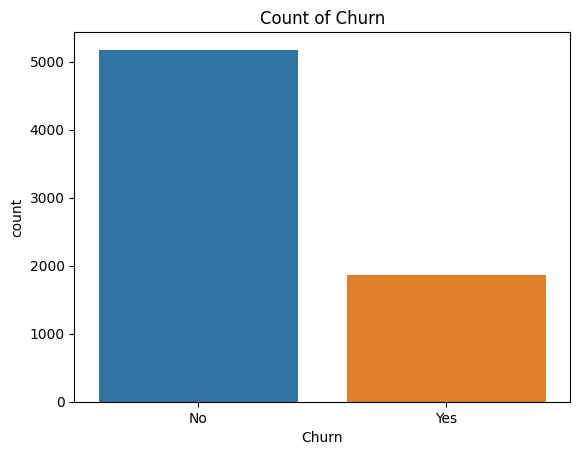

In [ ]:
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [ ]:
l1 = data.loc[data['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
No     5174
Yes    1869
Name: Churn, dtype: int64


In [ ]:
loss = []
for values in data.loc[data['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

2862927.0


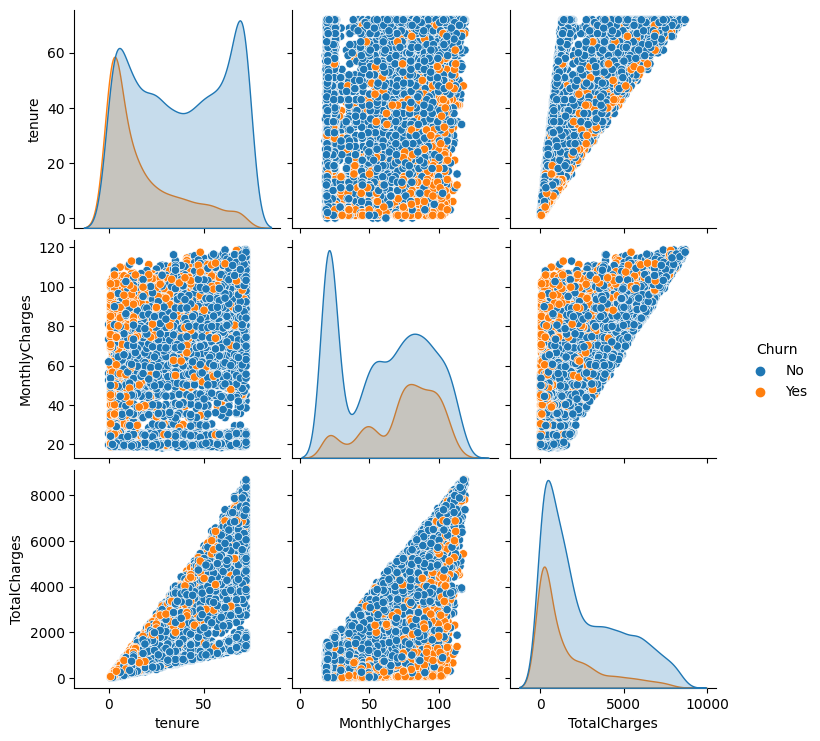

In [ ]:
sns.pairplot(data.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

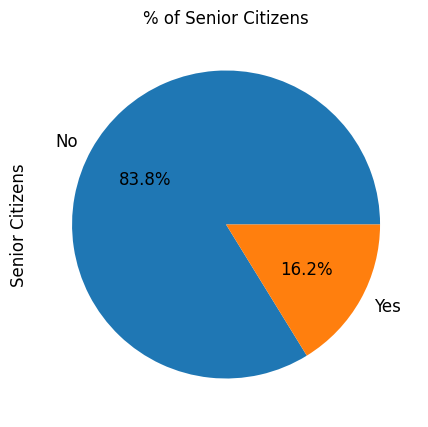

In [ ]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

<Figure size 640x480 with 0 Axes>

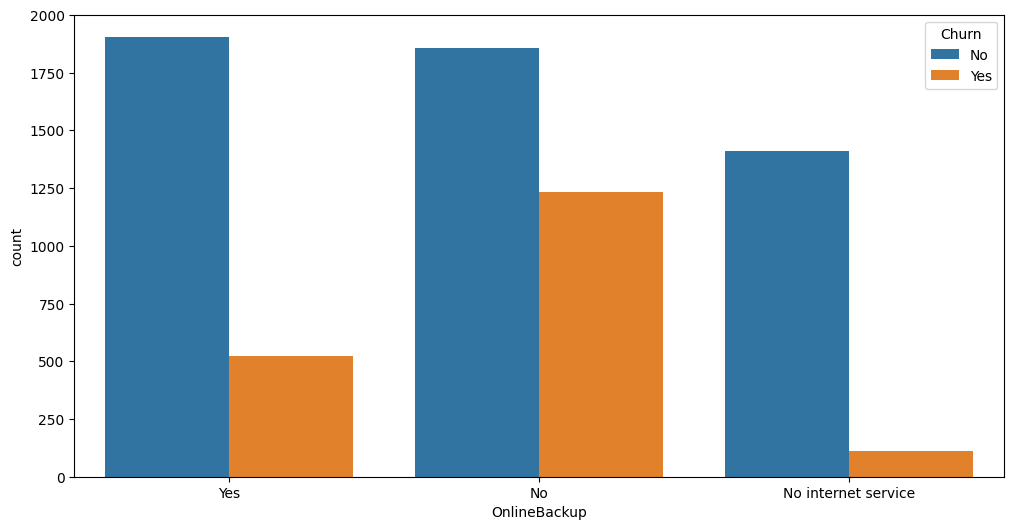

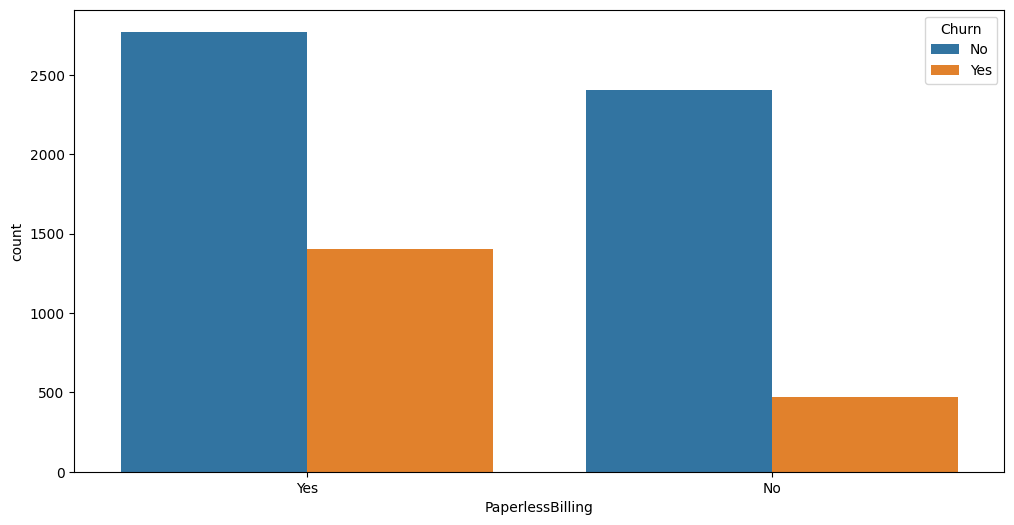

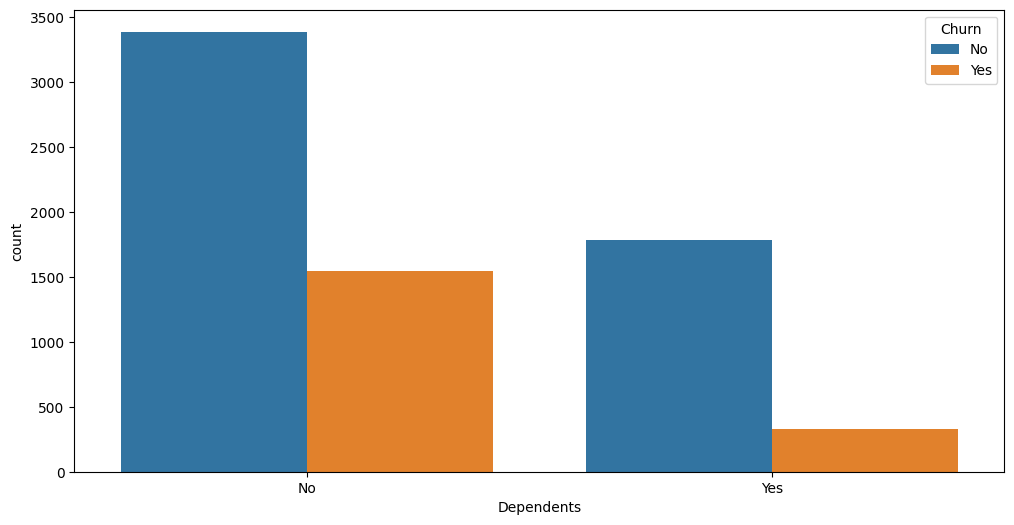

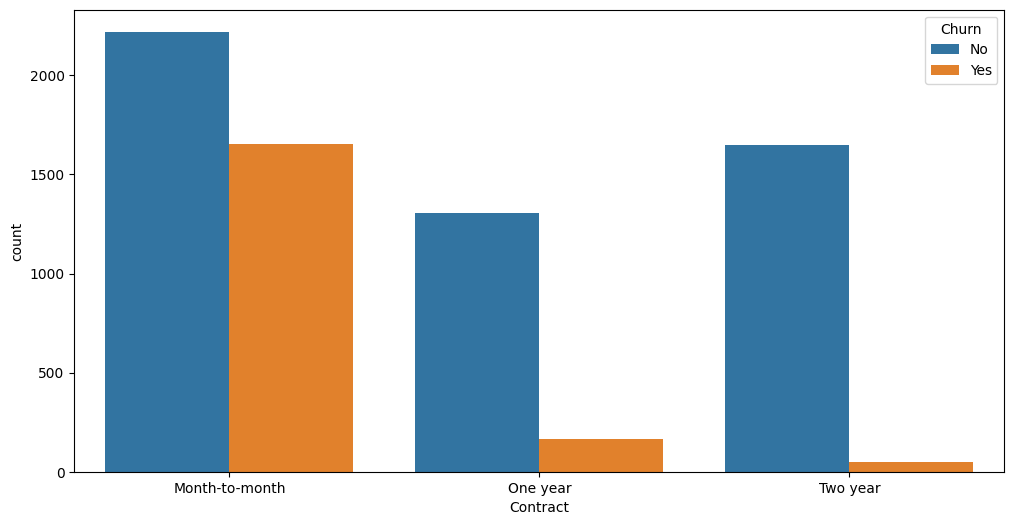

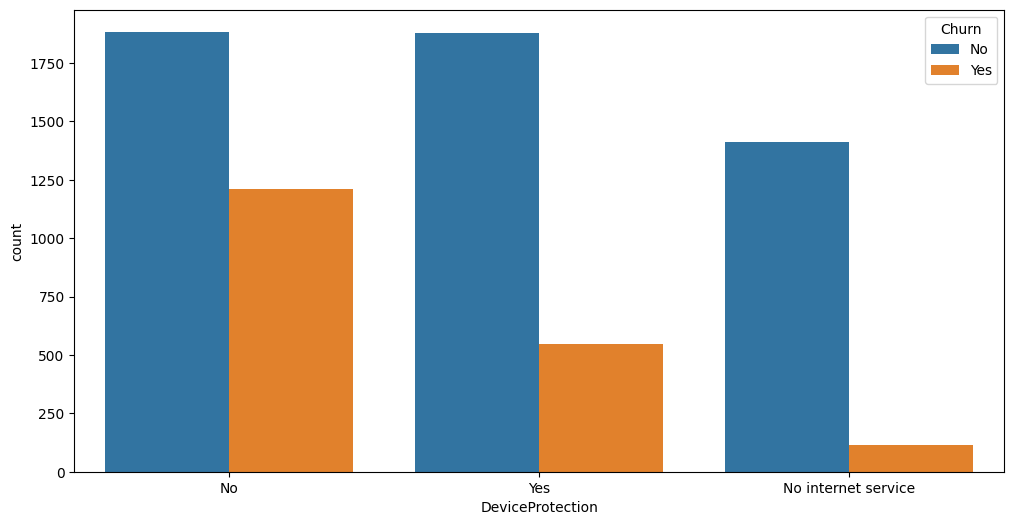

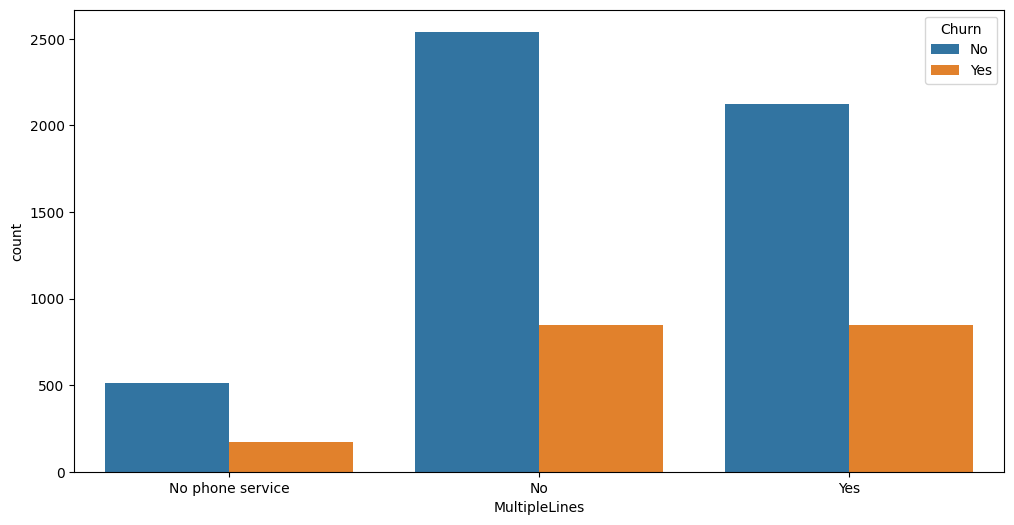

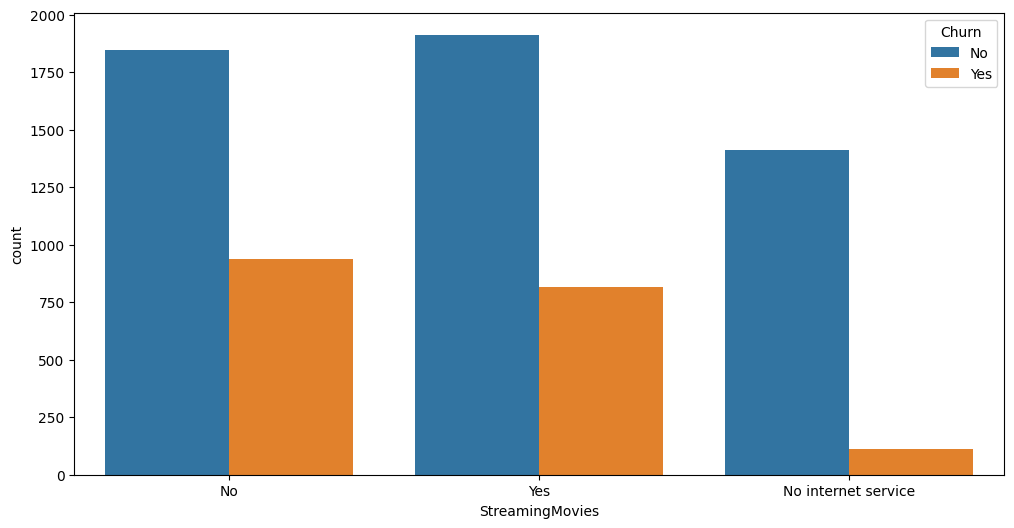

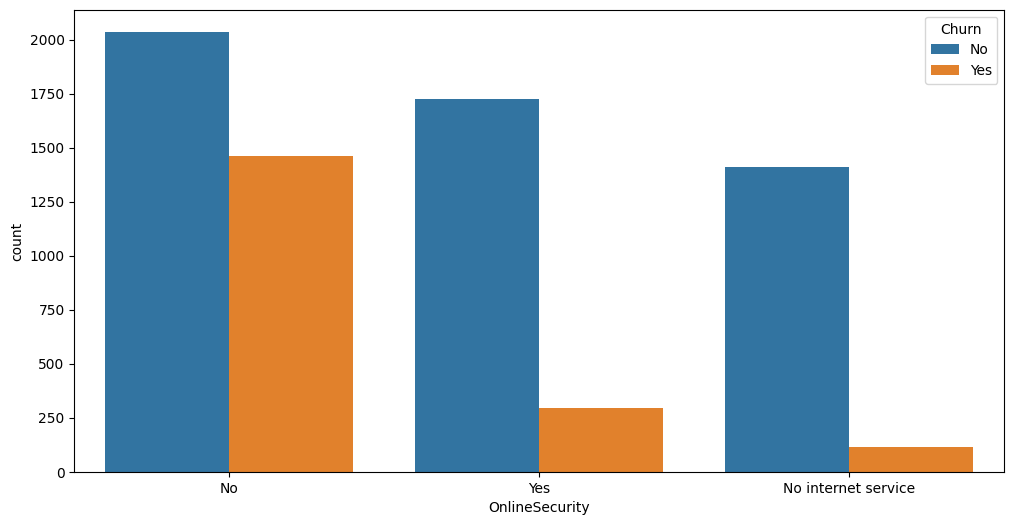

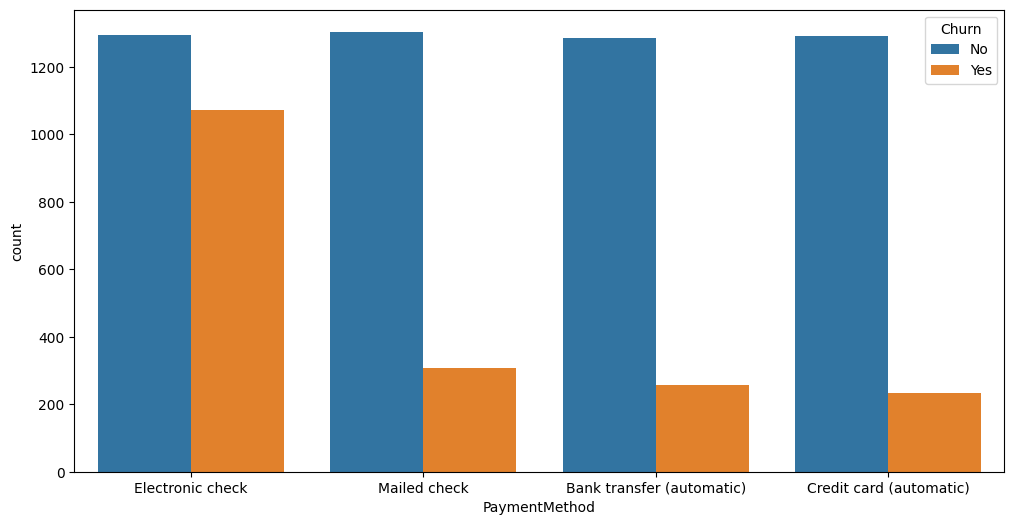

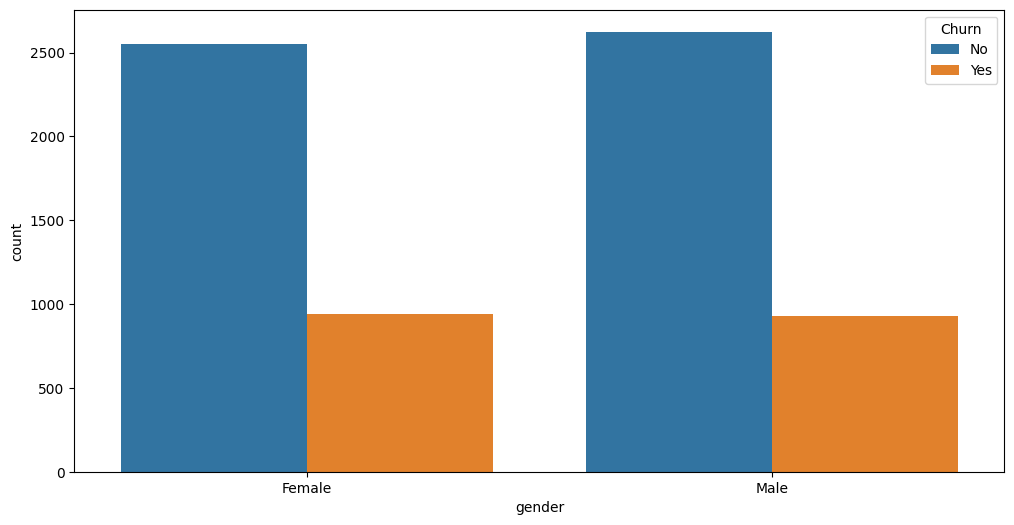

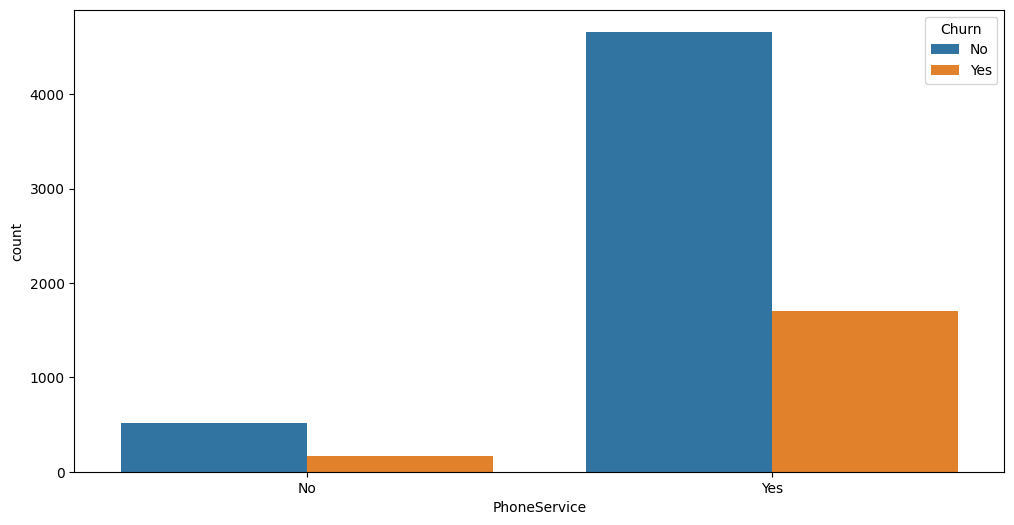

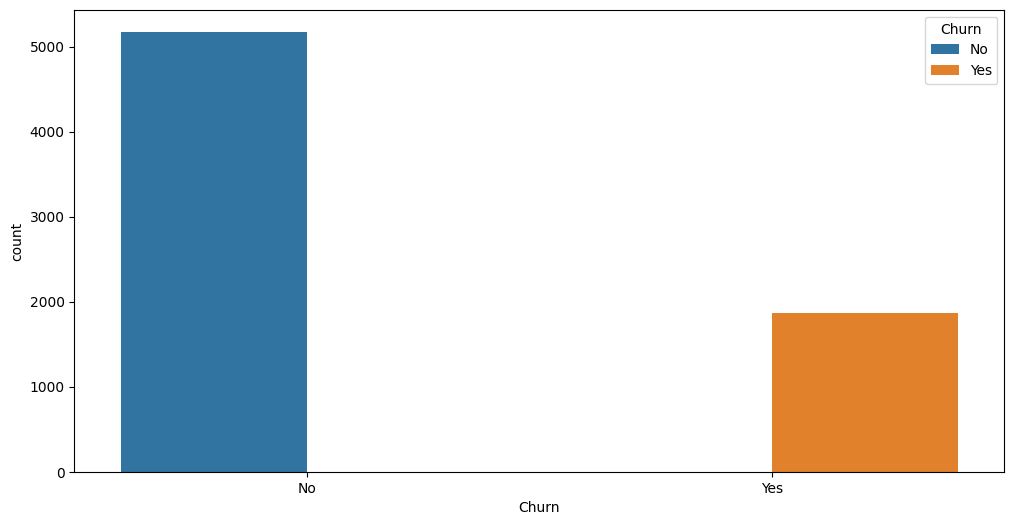

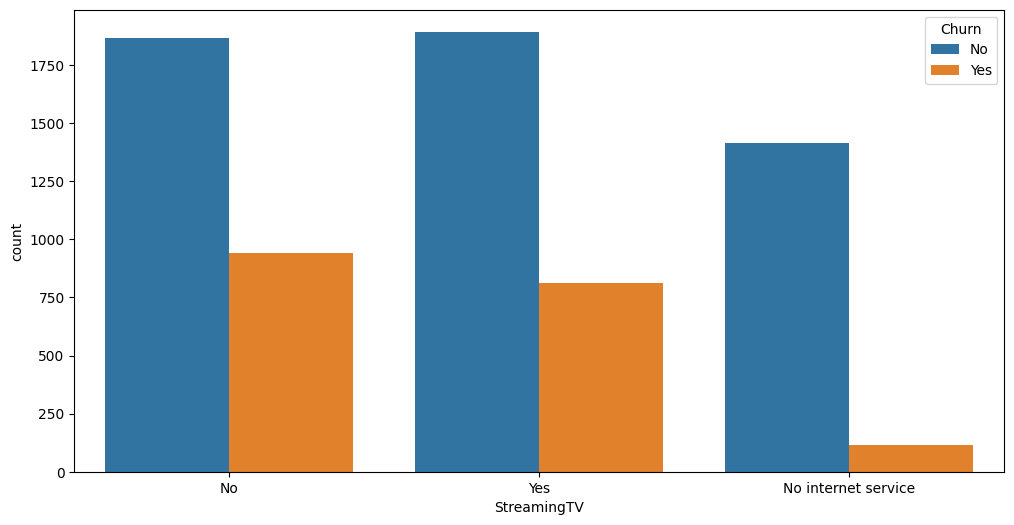

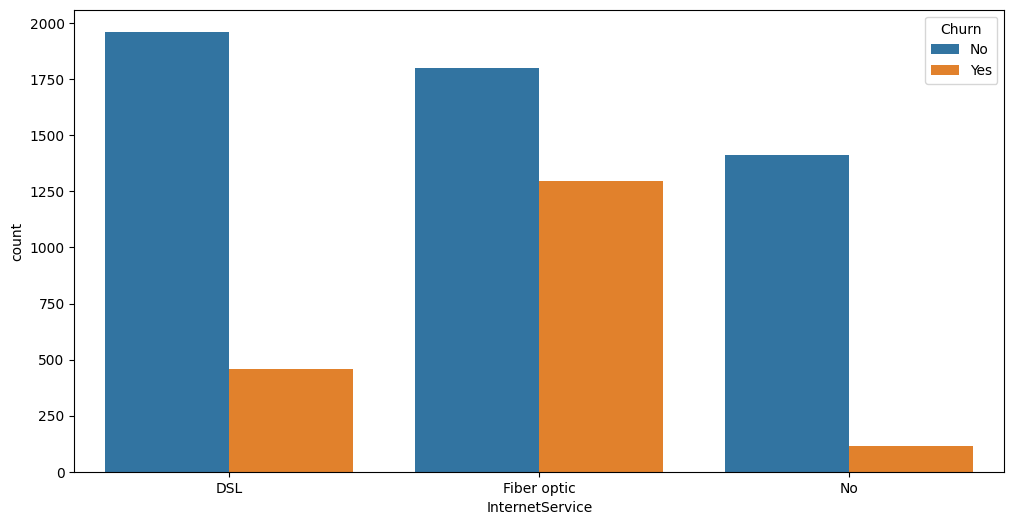

<Figure size 640x480 with 0 Axes>

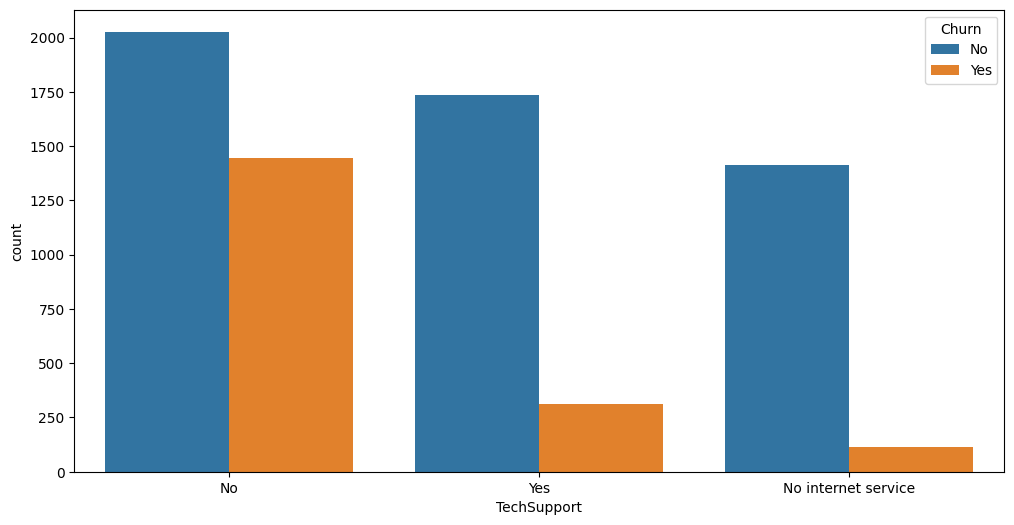

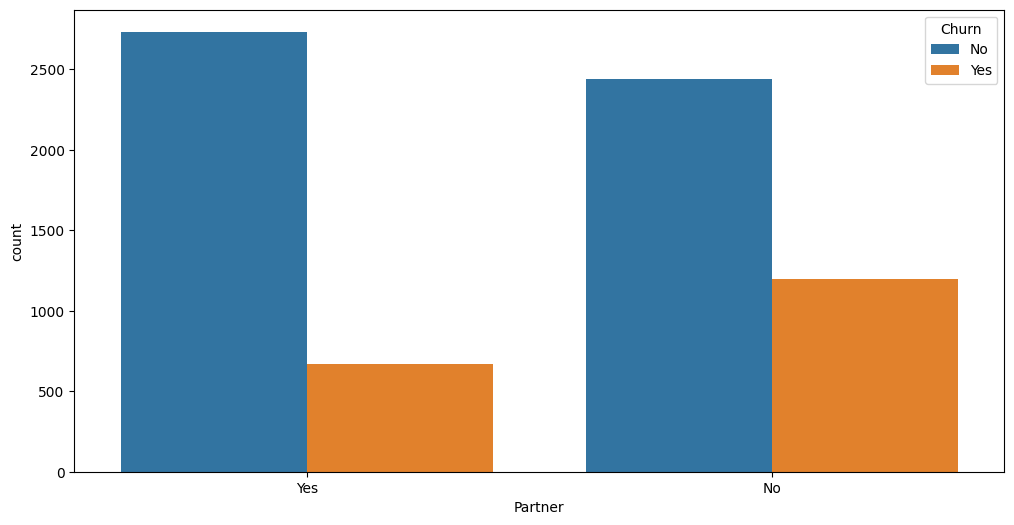

In [ ]:
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

preprocessing


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median())

<Axes: >

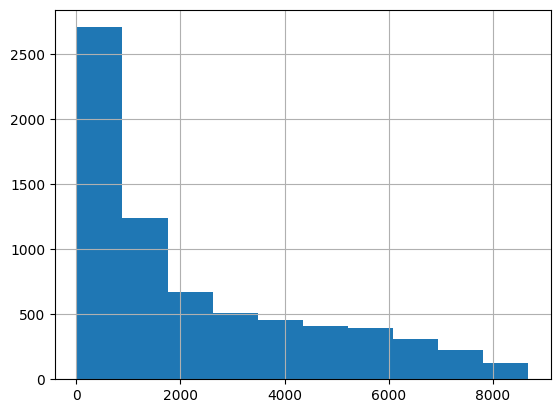

In [ ]:
data.TotalCharges.hist()

In [ ]:
print(categorical_feature)

{'OnlineBackup', 'PaperlessBilling', 'Dependents', 'Contract', 'DeviceProtection', 'MultipleLines', 'StreamingMovies', 'OnlineSecurity', 'PaymentMethod', 'gender', 'PhoneService', 'Churn', 'StreamingTV', 'InternetService', 'customerID', 'TechSupport', 'Partner'}


In [ ]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.drop(columns=['customerID'], inplace=True)

<Axes: >

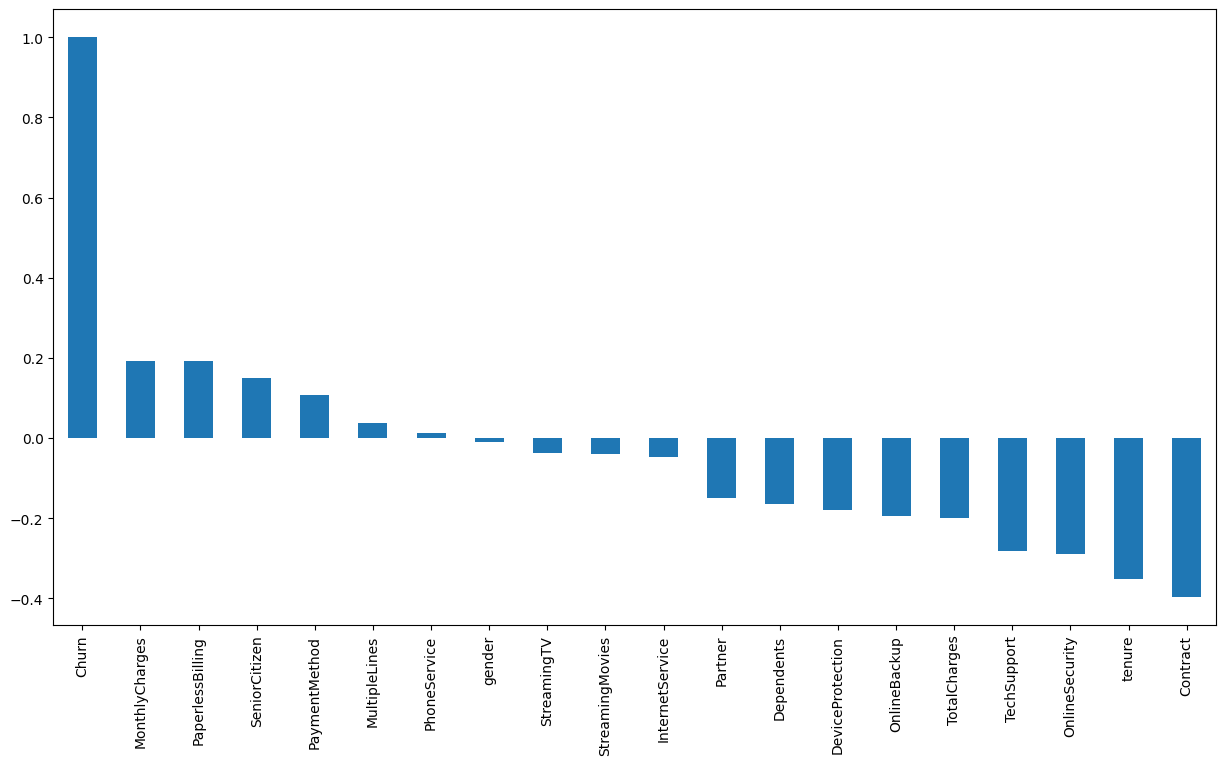

In [ ]:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

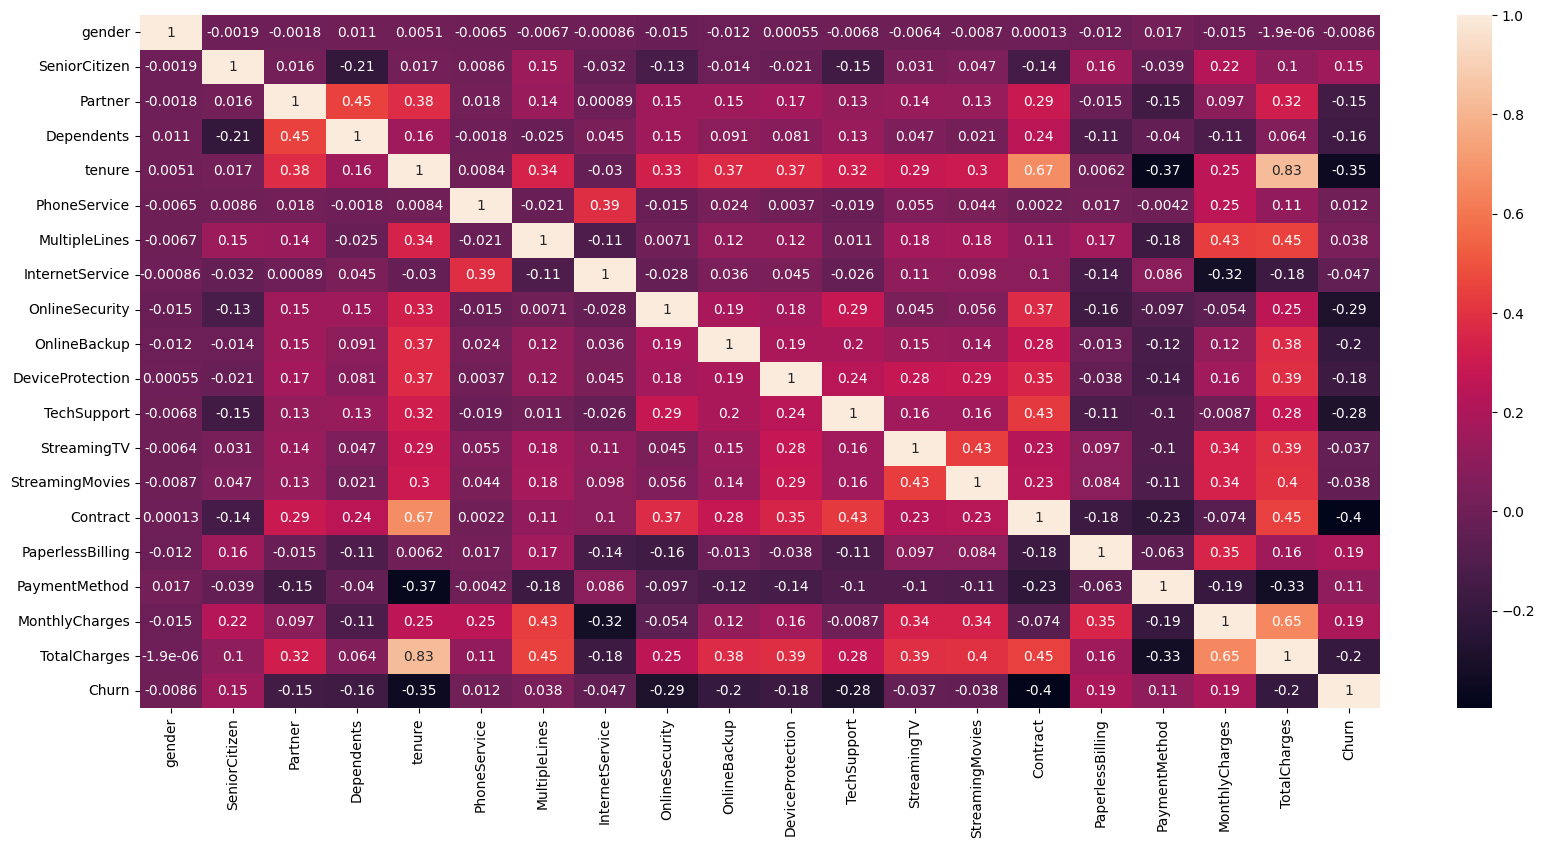

In [ ]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop(columns='Churn')
y = data['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
selection = SelectKBest()
X = selection.fit_transform(X,y)

In [ ]:
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(5634, 10)

In [ ]:
X_test.shape

(1409, 10)

In [ ]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8019872249822569
Confusion matrix :
 [[902 161]
 [118 228]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1063
           1       0.59      0.66      0.62       346

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.81      0.80      0.81      1409



In [ ]:
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.7885024840312278
Confusion matrix :
 [[910 188]
 [110 201]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1098
           1       0.52      0.65      0.57       311

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.72      1409
weighted avg       0.81      0.79      0.80      1409



In [ ]:
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7743080198722498
Confusion matrix :
 [[895 193]
 [125 196]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1088
           1       0.50      0.61      0.55       321

    accuracy                           0.77      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.79      0.77      0.78      1409



In [ ]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4154, 1: 1480})
The number of classes after fit Counter({1: 2468, 0: 2085})


In [ ]:
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [ ]:
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9341383095499451
Confusion matrix :
 [[395  14]
 [ 46 456]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       409
           1       0.97      0.91      0.94       502

    accuracy                           0.93       911
   macro avg       0.93      0.94      0.93       911
weighted avg       0.94      0.93      0.93       911



In [ ]:
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9396267837541163
Confusion matrix :
 [[407  21]
 [ 34 449]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       428
           1       0.96      0.93      0.94       483

    accuracy                           0.94       911
   macro avg       0.94      0.94      0.94       911
weighted avg       0.94      0.94      0.94       911



In [ ]:
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9187705817782656
Confusion matrix :
 [[394  27]
 [ 47 443]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       421
           1       0.94      0.90      0.92       490

    accuracy                           0.92       911
   macro avg       0.92      0.92      0.92       911
weighted avg       0.92      0.92      0.92       911



In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9571899012074643
Confusion matrix :
 [[422  20]
 [ 19 450]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       442
           1       0.96      0.96      0.96       469

    accuracy                           0.96       911
   macro avg       0.96      0.96      0.96       911
weighted avg       0.96      0.96      0.96       911



In [ ]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [ ]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=13, max_leaf_nodes=12, min_samples_leaf=9, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=13, max_leaf_nodes=12, min_samples_leaf=9, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=13, max_leaf_nodes=12, min_samples_leaf=9, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=13, max_leaf_nodes=12, min_samples_leaf=9, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=13, max_leaf_nodes=12, min_samples_leaf=9, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[C

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [ ]:
gbc_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, loss='deviance', max_depth=19,
                           max_leaf_nodes=18, min_samples_leaf=3,
                           min_samples_split=9, n_estimators=200)

In [ ]:
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9758507135016465
Confusion matrix :
 [[432  13]
 [  9 457]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       445
           1       0.97      0.98      0.98       466

    accuracy                           0.98       911
   macro avg       0.98      0.98      0.98       911
weighted avg       0.98      0.98      0.98       911



In [ ]:
import pickle

In [ ]:
filename = 'Model.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
load_model.score(X_test_sap, y_test_sap)

0.9758507135016465

In [ ]:
Dependents = 'Yes'
tenure = 1
OnlineSecurity = 'No'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 29.85
TotalCharges = 556.85

In [ ]:
data = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]

In [ ]:
df = pd.DataFrame(data, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df.head()
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [ ]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [ ]:
encoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = encoder.fit_transform(df[feature])

In [ ]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,29.85,556.85


In [ ]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]

In [ ]:
print(single)

[1]


In [ ]:
print(probability)

[0.99816908]


In [ ]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Churned!
Confidence level is [99.82]
